# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
merge_df
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
num_mice=n = len(pd.unique(merge_df['Mouse ID']))
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=merge_df[merge_df. duplicated()] 
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_dup_info = merge_df[merge_df['Mouse ID'].str.contains("g989")]
mouse_dup_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df=(merge_df.drop_duplicates("Mouse ID"))
#clean_df
clean_df=(merge_df.drop_duplicates())
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num2_mice= clean_df['Mouse ID'].nunique()
num2_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mean=clean_df.groupby(['Tumor Volume (mm3)']).mean()
summary_median=clean_df.groupby(['Tumor Volume (mm3)']).median()
summary_variance=clean_df.groupby(['Tumor Volume (mm3)']).var()
summary_stdev=clean_df.groupby(['Tumor Volume (mm3)']).std()
summary_sem=clean_df.groupby(['Tumor Volume (mm3)']).sem()

summary_mean
summary_mean
summary_variance
summary_stdev
summary_sem
#COME BACK TO THIS!!!!!!!!!!!

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


C:\Users\User\AppData\Local\Temp\ipykernel_1536\668856872.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_mean=clean_df.groupby(['Tumor Volume (mm3)']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_1536\668856872.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_median=clean_df.groupby(['Tumor Volume (mm3)']).median()
C:\Users\User\AppData\Local\Temp\ipykernel_1536\668856872.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which 

,Age_months,Weight (g),Timepoint,Metastatic Sites
Tumor Volume (mm3),,,,
22.050126,NaN,NaN,NaN,NaN
23.343598,NaN,NaN,NaN,NaN
24.365505,NaN,NaN,NaN,NaN
25.472143,NaN,NaN,NaN,NaN
26.546993,NaN,NaN,NaN,NaN
...,...,...,...,...
75.113288,NaN,NaN,NaN,NaN
75.123690,NaN,NaN,NaN,NaN
75.294936,NaN,NaN,NaN,NaN


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.



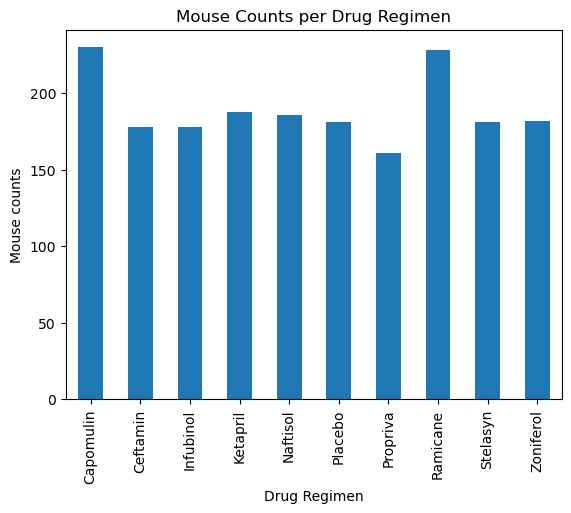

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_df = merge_df.groupby('Drug Regimen')

mouse_counts = drug_df['Mouse ID'].count()


patron_chart =mouse_counts.plot(kind="bar", title="Mouse Counts per Drug Regimen")
patron_chart.set_xlabel("Drug Regimen")
patron_chart.set_ylabel("Mouse counts")

plt.show()
plt.tight_layout()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Make a variable called branch and store a 'Home Library Definition' in it
male_mouse = "male"
female_mouse= "female"



# Collect the loans of the branch above
just_one_branch = sum_it_up.loc[branch]

# filter the data to patron types with greater than the value set for min_checkouts
just_one_branch = just_one_branch.loc[just_one_branch['Total Checkouts']>min_checkouts,:]

# Create a pie chart based upon the total checkouts (or loans) of that single branch
branch_pie = just_one_branch.plot(kind="pie", y='Total Checkouts', title=("Loans of " + branch + 
                                                                          " Branch for Patron Types Over "
                                                                         + str(min_checkouts) + " Loaned Items"))
branch_pie.set_ylabel("Branch Checkouts")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = clean_df.iloc[:,4]
avg_obs_volume = clean_df.iloc[:,6]
correlation = st.pearsonr(mouse_weight,avg_obs_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.59
